In [1]:
import pandas as pd 
import numpy as np

In [2]:
PATH = "credit_risk_dataset.csv" 

In [3]:
df = pd.read_csv(PATH) 

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
# checking column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.shape

(32581, 12)

## checking Duplicates

In [7]:
dup=df.duplicated()

In [8]:
dup.value_counts()

False    32416
True       165
dtype: int64

## Dropping Duplicates

In [9]:
df.drop_duplicates(inplace=True) 

In [10]:
df.shape

(32416, 12)

In [11]:
# checking is there any  null values
df.isnull().sum()  

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

- There are 895 null values in person_emp_length and loan_int_rate having 3116 null values.

#### Treating null values in the person_emp_length and loan_int_rate

In [12]:
# checking mean and median of person_emp_length column
print("mean of person_emp_length:",df["person_emp_length"].mean())
print("mean of person_emp_length:",df["person_emp_length"].median()) 

mean of person_emp_length: 4.7905103238288556
mean of person_emp_length: 4.0


In [13]:
# filling null values with median in person_emp_length feature
df["person_emp_length"]=df["person_emp_length"].replace(np.nan,df["person_emp_length"].median())

In [14]:
# checking is there any null values after replacing them with median
df["person_emp_length"].isnull().sum() 

0

In [15]:
# checking mean and median of person_int_rate column
print("mean of loan_int_rate:",df["loan_int_rate"].mean())
print("mean of loan_int_rate:",df["loan_int_rate"].median())

mean of loan_int_rate: 11.017265100098276
mean of loan_int_rate: 10.99


In [16]:
# filling null values with median in person_int_rate feature
df["loan_int_rate"]=df["loan_int_rate"].replace(np.nan,df["loan_int_rate"].median())

In [17]:
# checking is there any null values after replacing them with median
df["loan_int_rate"].isnull().sum() 

0

In [18]:
# checking info after removing null values 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [19]:
# checking is there any  null values
df.isnull().sum() 

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

- There is no null values in the dataframe.

# Analysing Features-Univariate
##### Non Viz
- Min
- Max
- Central Tendency
- Percentiles
- Dispersion

##### Viz
- Plot of Dist- Distribution
- Plot of box plot - Outlier

## Analysing persong_age column - Univariate(NUMERICAL)

In [20]:
# Non-vizualisation statistical analysis
print("min of person_age:",df["person_age"].min())
print("max of person_age:",df["person_age"].max())
print("mean of person_age:",df["person_age"].mean())
print("median of person_age:",df["person_age"].median())                                       
print("standard deviation of person_age:",df["person_age"].std()) 

min of person_age: 20
max of person_age: 144
mean of person_age: 27.74700765054294
median of person_age: 26.0
standard deviation of person_age: 6.354099947312116


<AxesSubplot:ylabel='Frequency'>

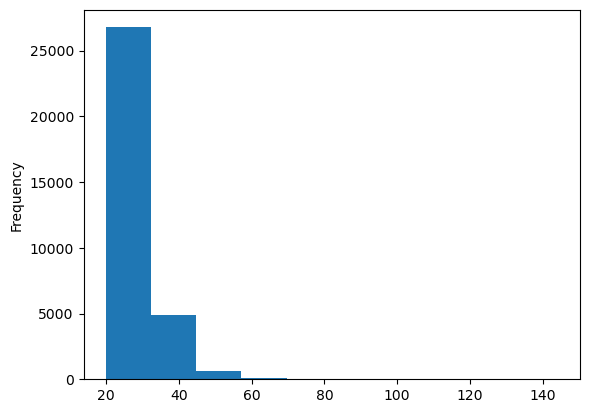

In [21]:
# plotting the distribution for person_age column
df["person_age"].plot(kind="hist")   

- Mostly 20 to 70 years age persons taking the loans highly and the highest age of the person who took the loan is 140.

<AxesSubplot:>

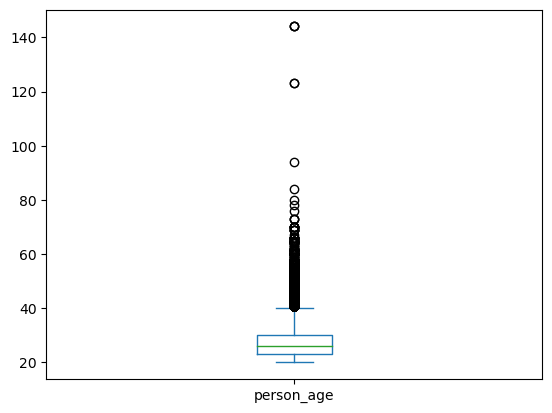

In [22]:
# detecting outliers in person_age column using box column
df["person_age"].plot(kind="box")            

In [23]:
df = df[df['person_age']<=80]

In [24]:
len(df["person_age"]) 

32409

- There are some outliers in the persoon_age column.

In [25]:
from scipy import stats
import matplotlib.pyplot as plt 

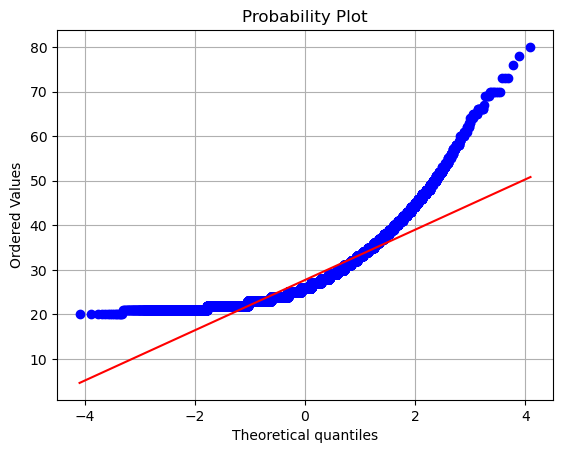

In [26]:
# QQ plot for age column to check distribution for person_age column
stats.probplot(df["person_age"],dist="norm",plot=plt)
plt.grid() 

In [27]:
# # Set the lower and upper thresholds for capping
# lower_threshold = 18
# upper_threshold = 100

# # Capping the outliers below the lower threshold
# df.loc[df["person_age"] < lower_threshold, "person_age"] = lower_threshold

# # Capping the outliers above the upper threshold
# df.loc[df["person_age"] > upper_threshold, "person_age"] = upper_threshold 

<AxesSubplot:>

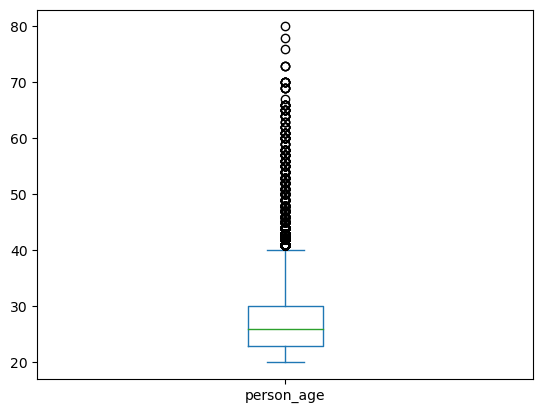

In [28]:
# detecting outliers in person_age column using box column
df["person_age"].plot(kind="box") 

- person_age column does not follows normal distribution.

In [29]:
import warnings
warnings.filterwarnings('ignore')

#### Removing outliers in the person_age column by capping

In [30]:
# # Define the threshold values for capping
# lower_threshold = df["person_age"].quantile(0.05)  # 5th percentile
# upper_threshold = df["person_age"].quantile(0.95)  # 95th percentile

# # Cap the outliers below the lower threshold
# df["person_age"] = np.where(df["person_age"] < lower_threshold, lower_threshold, df["person_age"])

# # Cap the outliers above the upper threshold
# df["person_age"] = np.where(df["person_age"] > upper_threshold, upper_threshold, df["person_age"]) 

## Analysing person_income column - Univariate(NUMERICAL)

In [31]:
# Non-vizualisation statistical analysis
print("min of person_income:",df["person_income"].min())
print("max of person_income:",df["person_income"].max())
print("mean of person_income:",df["person_income"].mean())
print("median of person_income:",df["person_income"].median())
print("standard deviation of person_income:",df["person_income"].std())

min of person_income: 4000
max of person_income: 2039784
mean of person_income: 65898.35616649696
median of person_income: 55000.0
standard deviation of person_income: 52521.79432148849


<AxesSubplot:>

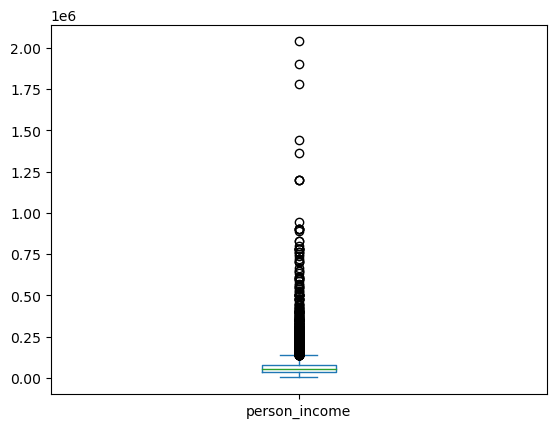

In [32]:
# detecting outliers in person_income column using box column
df["person_income"].plot(kind="box") 

In [33]:
df = df[df['person_income']<=100000]

In [34]:
len(df)

28221

In [35]:
# # removing outliers using IQR
# person_income_q1 = df["person_income"].quantile(0.25)
# person_income_q3  = df["person_income"].quantile(0.75)

# IQR = person_income_q3 - person_income_q1
# person_income_lower_bound =  person_income_q1 - 1.5* IQR
# person_income_upper_bound = person_income_q3 + 1.5* IQR

# df = df[(df["person_income"]>person_income_lower_bound) & (df["person_income"]<person_income_upper_bound)]

<AxesSubplot:>

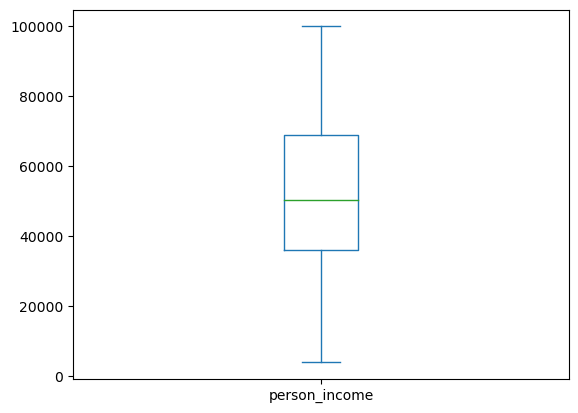

In [36]:
df["person_income"].plot(kind="box") 

- There are some outliers in the person_income feature.

## Analysing person_home_ownership feature- Univariate(Categorical)

In [37]:
# getting value_counts
df['person_home_ownership'].value_counts() 

RENT        15309
MORTGAGE    10511
OWN          2309
OTHER          92
Name: person_home_ownership, dtype: int64

In [38]:
# getting value_counts by normalization
df['person_home_ownership'].value_counts(normalize=True) 

RENT        0.542468
MORTGAGE    0.372453
OWN         0.081819
OTHER       0.003260
Name: person_home_ownership, dtype: float64

<AxesSubplot:>

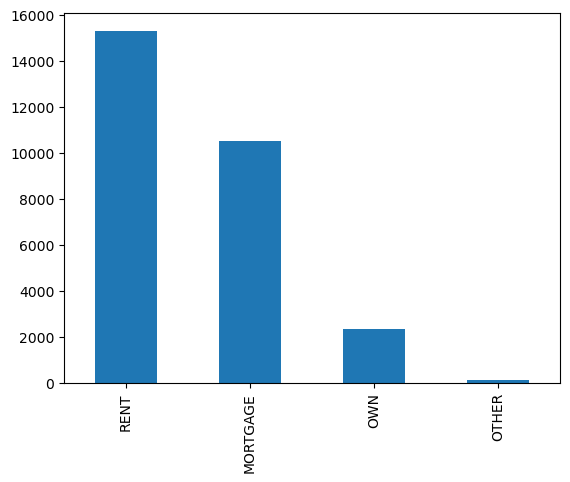

In [39]:
# count plot for person_home_ownership column
df['person_home_ownership'].value_counts().plot(kind="bar") 

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

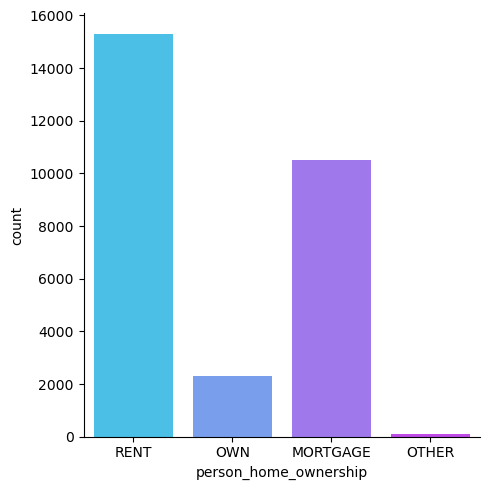

In [41]:
sns.catplot(x='person_home_ownership', data=df, kind='count',palette='cool')
plt.show()

- Persons living for rent are higher compare to others.

## Analysing person_emp_length feature -Univariate(Numerical)

In [42]:
# Non-vizualisation statistical analysis
print("min of person_emp_length:",df["person_emp_length"].min())
print("max of person_emp_length:",df["person_emp_length"].max())
print("mean of person_emp_length:",df["person_emp_length"].mean())
print("median of person_emp_length:",df["person_emp_length"].median())
print("standard deviation of person_emp_length:",df["person_emp_length"].std())

min of person_emp_length: 0.0
max of person_emp_length: 123.0
mean of person_emp_length: 4.583076432443924
median of person_emp_length: 4.0
standard deviation of person_emp_length: 3.90170907555667


<AxesSubplot:>

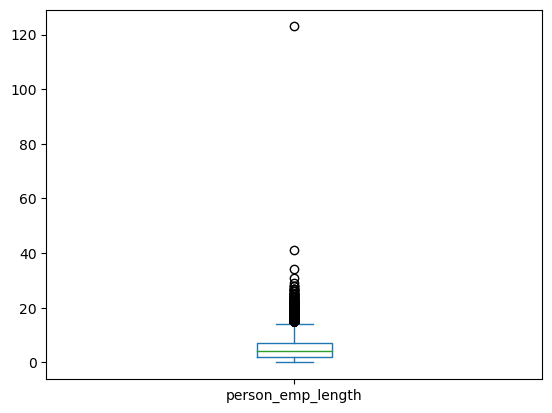

In [43]:
# detecting outliers in person_emp_length column using box column
df["person_emp_length"].plot(kind="box")  

- There are some outliers in the person_emp_length column.

In [44]:
df = df[df['person_emp_length']<40]

In [45]:
len(df)

28219

## Analysing loan_intent feature -Univariate(Categorical)

In [46]:
# getting value_counts for loan_intent feature
df["loan_intent"].value_counts() 

EDUCATION            5645
MEDICAL              5414
VENTURE              4921
PERSONAL             4784
DEBTCONSOLIDATION    4487
HOMEIMPROVEMENT      2968
Name: loan_intent, dtype: int64

In [47]:
# getting value_counts for loan_intent feature using normalization
df["loan_intent"].value_counts(normalize=True) 

EDUCATION            0.200043
MEDICAL              0.191857
VENTURE              0.174386
PERSONAL             0.169531
DEBTCONSOLIDATION    0.159006
HOMEIMPROVEMENT      0.105177
Name: loan_intent, dtype: float64

<AxesSubplot:>

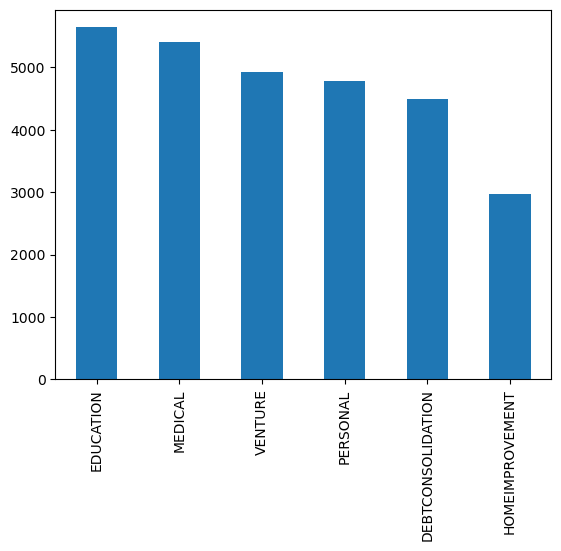

In [48]:
# count plot for loan_intent column
df['loan_intent'].value_counts().plot(kind="bar") 

- The persons taking loan for education are higher compare to others.

## Analysing loan_grade feature - Univariate(Categorical)

In [49]:
# getting value_counts for loan_grade feature
df["loan_grade"].value_counts() 

A    9308
B    9009
C    5683
D    3171
E     806
F     195
G      47
Name: loan_grade, dtype: int64

In [50]:
# getting value_counts for loan_grade feature
df["loan_grade"].value_counts(normalize=True)

A    0.329849
B    0.319253
C    0.201389
D    0.112371
E    0.028562
F    0.006910
G    0.001666
Name: loan_grade, dtype: float64

<AxesSubplot:>

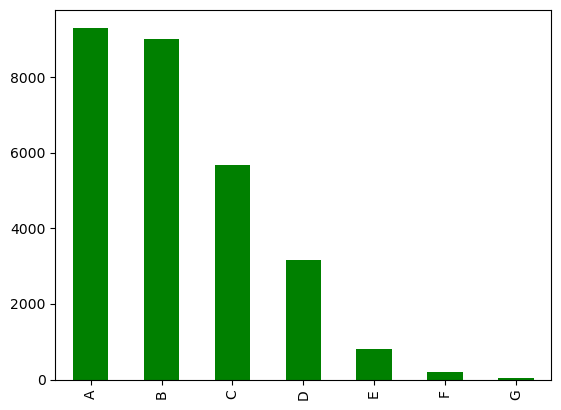

In [51]:
# count plot for loan_grade column
df['loan_grade'].value_counts().plot(kind="bar",color="Green") 

- cateogry A persons are high compare to others. 

## Analysing loan_amnt feature - Univariate(Numerical)

In [52]:
# Non-vizualisation statistical analysis
print("min of loan_amnt:",df["loan_amnt"].min())
print("max of loan_amnt:",df["loan_amnt"].max())
print("mean of loan_amnt:",df["loan_amnt"].mean())
print("median of loan_amnt:",df["loan_amnt"].median())
print("standard deviation of loan_amnt:",df["loan_amnt"].std()) 

min of loan_amnt: 500
max of loan_amnt: 35000
mean of loan_amnt: 8898.408873454056
median of loan_amnt: 7750.0
standard deviation of loan_amnt: 5712.879005850853


<AxesSubplot:>

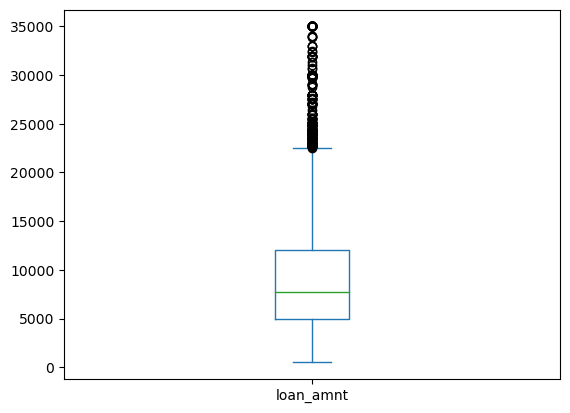

In [53]:
# detecting outliers in loan_amount column using box column
df["loan_amnt"].plot(kind="box")

- loan_amnt feature having outliers.

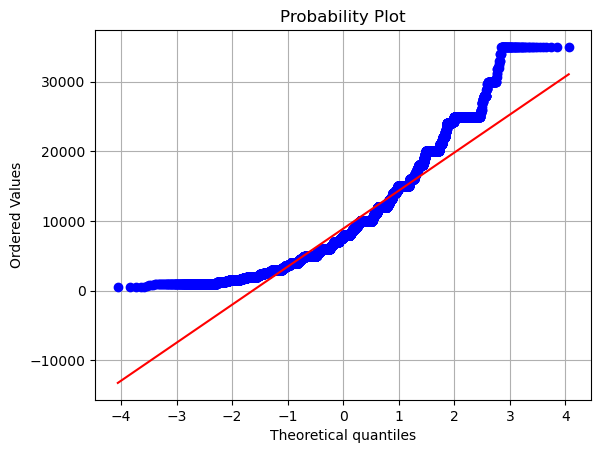

In [54]:
# QQ plot for age column to check distribution for loan_amnt column
stats.probplot(df["loan_amnt"],dist="norm",plot=plt)
plt.grid() 

- loan_amnt does not follows normal distribition.

## Analysing loan_int_rate feature - Univariate(Numerical)

In [55]:
# Non-vizualisation statistical analysis
print("min of loan_int_rate:",df["loan_int_rate"].min())
print("max of loan_int_rate:",df["loan_int_rate"].max())
print("mean of loan_int_rate:",df["loan_int_rate"].mean())
print("median of loan_int_rate:",df["loan_int_rate"].median())
print("standard deviation of loan_int_rate:",df["loan_int_rate"].std())  

min of loan_int_rate: 5.42
max of loan_int_rate: 23.22
mean of loan_int_rate: 11.005398490377882
median of loan_int_rate: 10.99
standard deviation of loan_int_rate: 3.0728691062918347


<AxesSubplot:ylabel='Density'>

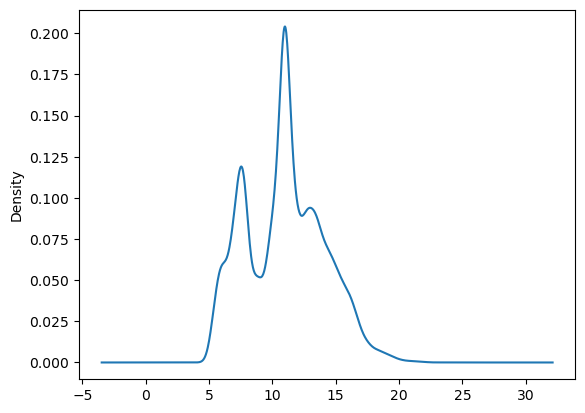

In [56]:
# plotting the distribution for loan_int_rate column
df["loan_int_rate"].plot(kind="kde") 

<AxesSubplot:>

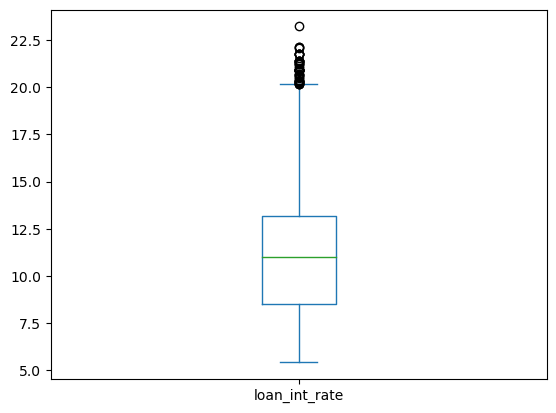

In [57]:
# detecting outliers in loan_int_rate column using box column
df["loan_int_rate"].plot(kind="box") 

- There are some outliers in the loan_int_rate feature. 

In [58]:
df = df[df['loan_int_rate']<=22.5]

In [59]:
len(df)

28218

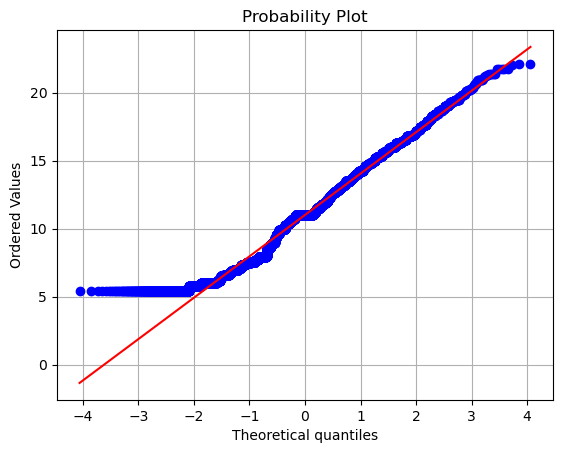

In [60]:
 # QQ plot for age column to check distribution for loan_int_rate column
stats.probplot(df["loan_int_rate"],dist="norm",plot=plt)
plt.grid() 

- loan_int_rate does not follows normal distribution.

## Analysing loan_status feature - Univarite(Numerical)

In [61]:
# Non-vizualisation statistical analysis
print("min of loan_status:",df["loan_status"].min())
print("max of loan_status:",df["loan_status"].max())
print("mean of loan_status:",df["loan_status"].mean())
print("median of loan_status:",df["loan_status"].median())
print("standard deviation of loan_status:",df["loan_status"].std())

min of loan_status: 0
max of loan_status: 1
mean of loan_status: 0.23697639804380183
median of loan_status: 0.0
standard deviation of loan_status: 0.42523522073964043


<AxesSubplot:ylabel='Density'>

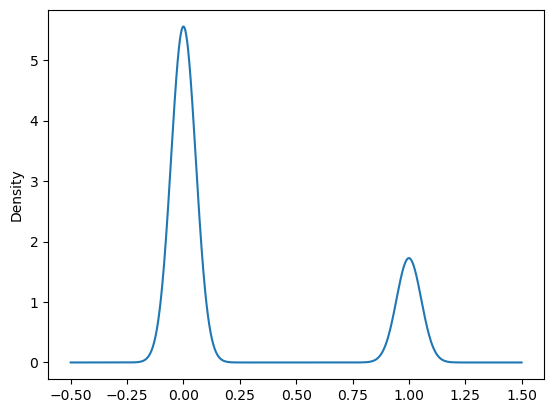

In [62]:
# plotting the distribution for loan_status column
df["loan_status"].plot(kind="kde")  

<AxesSubplot:>

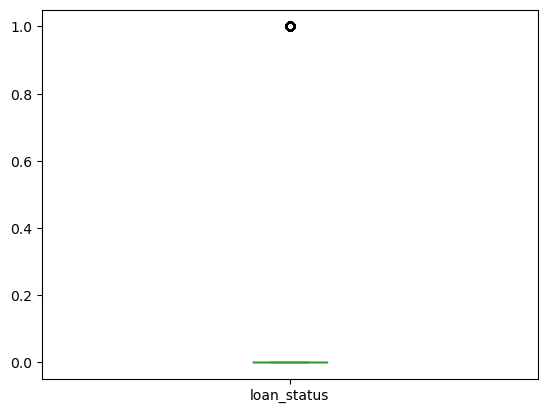

In [63]:
# detecting outliers in loan_status column using box column
df["loan_status"].plot(kind="box") 

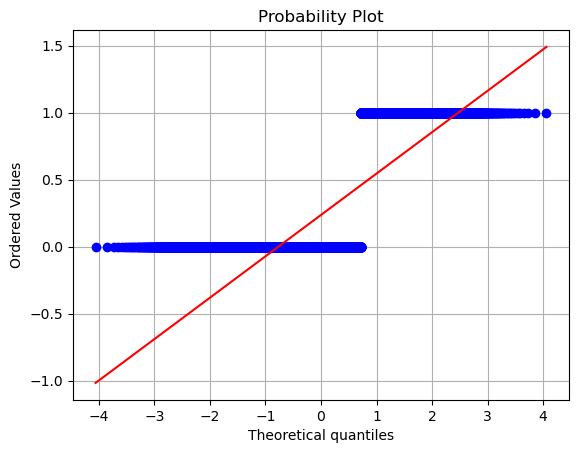

In [64]:
# QQ plot for age column to check distribution for loan_status column
stats.probplot(df["loan_status"],dist="norm",plot=plt)
plt.grid() 

- loan_status column does not follows normal distribution.

## Analysing loan_percent_income feature-Univariate(Numerical)

In [65]:
# Non-vizualisation statistical analysis
print("min of loan_percent_income:",df["loan_percent_income"].min())
print("max of loan_percent_income:",df["loan_percent_income"].max())
print("mean of loan_percent_income:",df["loan_percent_income"].mean())
print("median of loan_percent_income:",df["loan_percent_income"].median())
print("standard deviation of loan_percent_income:",df["loan_percent_income"].std())

min of loan_percent_income: 0.01
max of loan_percent_income: 0.83
mean of loan_percent_income: 0.1801367921185093
median of loan_percent_income: 0.16
standard deviation of loan_percent_income: 0.10850204041048137


<AxesSubplot:ylabel='Density'>

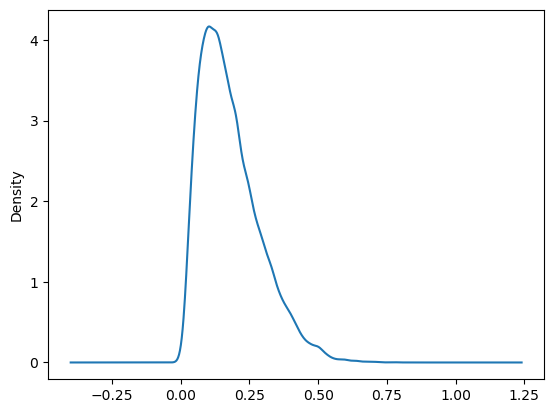

In [66]:
# plotting the distribution for loan_percent_income column
df["loan_percent_income"].plot(kind="kde")

<AxesSubplot:>

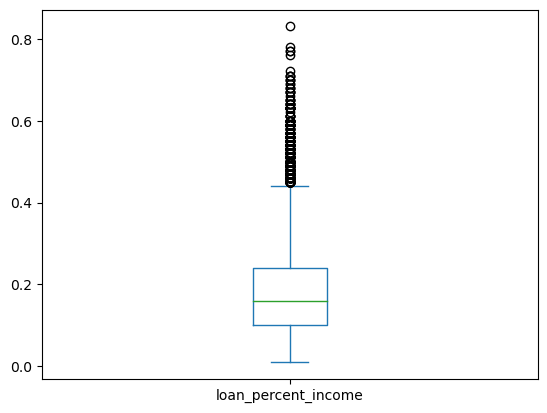

In [67]:
# detecting outliers in loan_percent_income column using box column
df["loan_percent_income"].plot(kind="box")

- There are some outliers in the loan_percent_income column.

In [68]:
df = df[df['loan_percent_income']<=0.75]

In [69]:
len(df)

28213

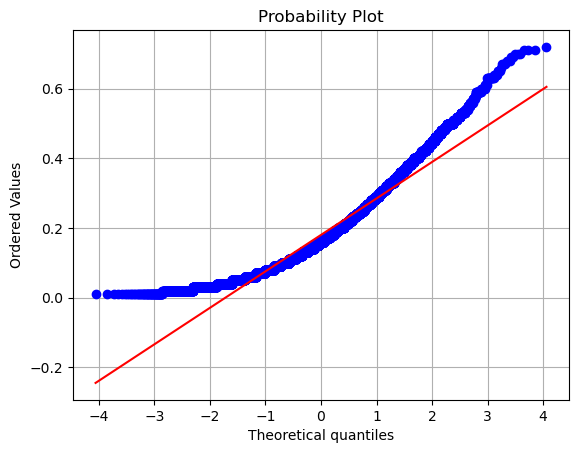

In [70]:
# QQ plot for age column to check distribution for loan_percent_income column
stats.probplot(df["loan_percent_income"],dist="norm",plot=plt)
plt.grid() 

- loan_percent_income feature does not follows normal distribution.

## Analysing cb_person_default_on_file feature-Univariate(Categorical)

In [71]:
# getting value_counts for cb_person_default_on_file  feature
df['cb_person_default_on_file'].value_counts()

N    23223
Y     4990
Name: cb_person_default_on_file, dtype: int64

In [72]:
# getting value_counts for cb_person_default_on_file  feature using normalizations
df['cb_person_default_on_file'].value_counts(normalize=True)

N    0.823131
Y    0.176869
Name: cb_person_default_on_file, dtype: float64

<AxesSubplot:>

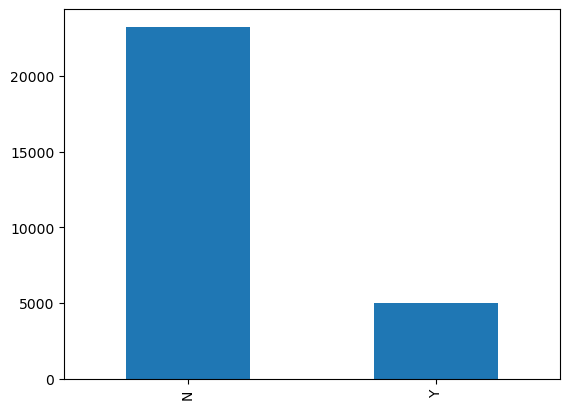

In [73]:
# count plot for cb_person_default_on_file column
df['cb_person_default_on_file'].value_counts().plot(kind="bar")

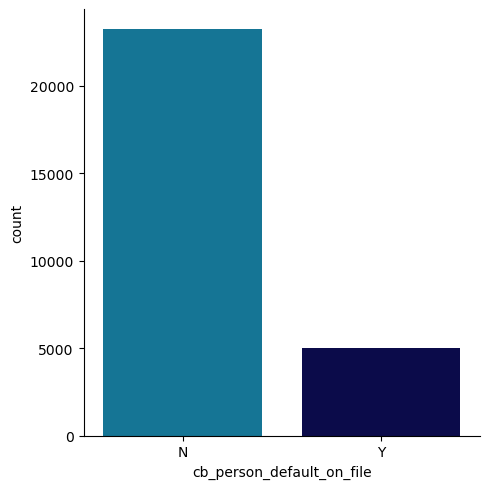

In [74]:
sns.catplot(x='cb_person_default_on_file', data=df, kind='count',palette='ocean_r')
plt.show() 

## Analysing cb_person_cred_hist_length feature - Univariate(Numerical)

In [75]:
# Non-vizualisation statistical analysis
print("min of cb_person_cred_hist_length:",df["cb_person_cred_hist_length"].min())
print("max of cb_person_cred_hist_length:",df["cb_person_cred_hist_length"].max())
print("mean of cb_person_cred_hist_length:",df["cb_person_cred_hist_length"].mean())
print("median of cb_person_cred_hist_length:",df["cb_person_cred_hist_length"].median())
print("standard deviation of cb_person_cred_hist_length:",df["cb_person_cred_hist_length"].std()) 

min of cb_person_cred_hist_length: 2
max of cb_person_cred_hist_length: 30
mean of cb_person_cred_hist_length: 5.683160245277
median of cb_person_cred_hist_length: 4.0
standard deviation of cb_person_cred_hist_length: 4.005139763891362


<AxesSubplot:ylabel='Density'>

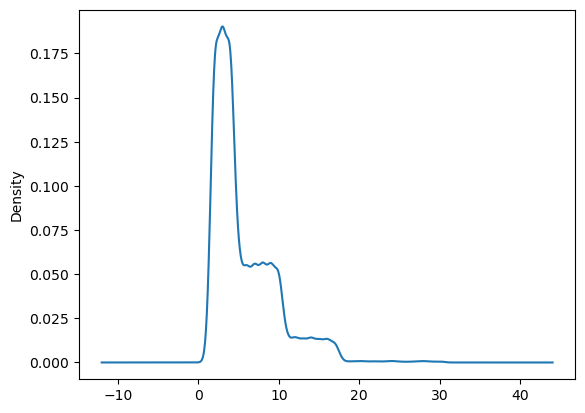

In [76]:
# plotting the distribution for cb_person_cred_hist_length column
df["cb_person_cred_hist_length"].plot(kind="kde")

<AxesSubplot:>

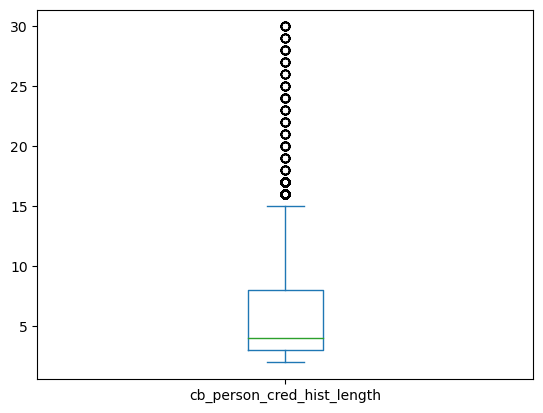

In [77]:
# detecting outliers in cb_person_cred_hist_length column using box column
df["cb_person_cred_hist_length"].plot(kind="box")

- There are some outliers in the cb_person_cred_hist_length column.

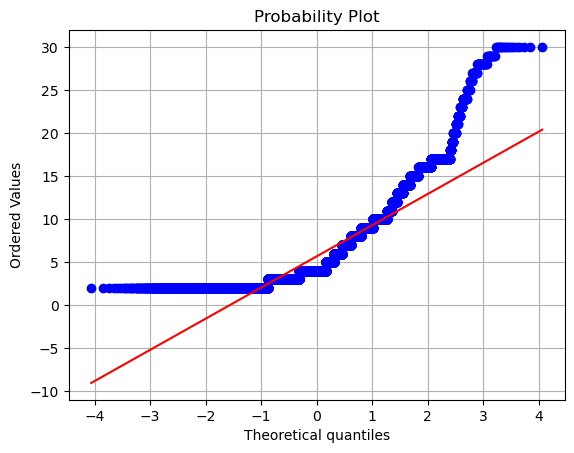

In [78]:
# QQ plot for age column to check distribution for cb_person_cred_hist_length column
stats.probplot(df["cb_person_cred_hist_length"],dist="norm",plot=plt)
plt.grid() 

- cb_person_cred_hist_length does not follows normal distribution.

 ## Bivariate Analysis

## Analysing relationship between target variable() and reamining  features.

### Analysing relationship between loan_status and person_age attributes.(Num vs Num)

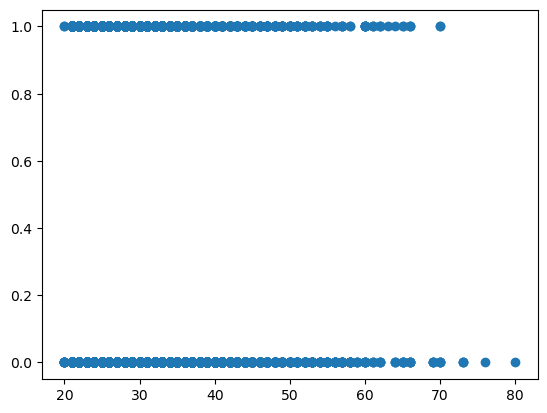

In [79]:
plt.scatter(x=df["person_age"],y=df["loan_status"]) 

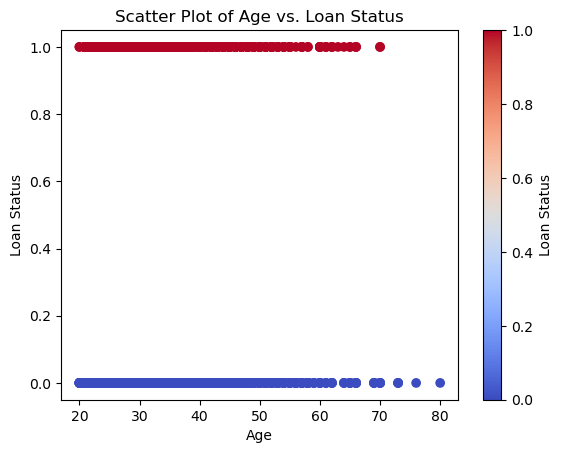

In [80]:
plt.scatter(x=df["person_age"], y=df["loan_status"], c=df["loan_status"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Loan Status")
plt.title("Scatter Plot of Age vs. Loan Status")
plt.colorbar(label="Loan Status")
plt.show() 

- Age can play a role in loan default. Younger individuals may have more stable financial situations, while older individuals might have less established careers and financial stability. 

### Analysing relationship between loan_status and person_income features.(Num vs Num)

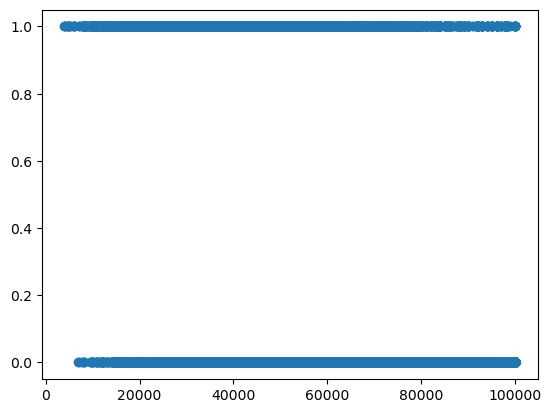

In [81]:
plt.scatter(x=df["person_income"],y=df["loan_status"])  

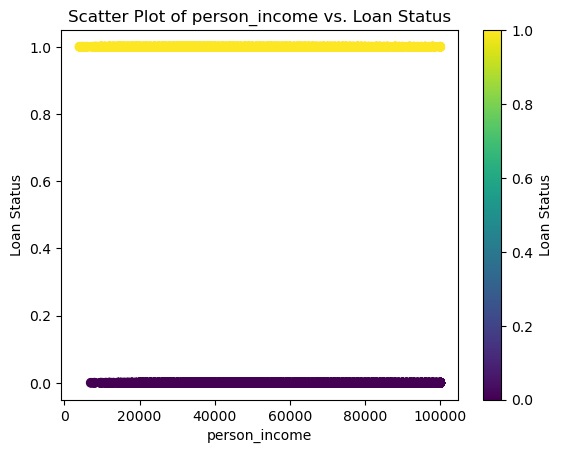

In [82]:

plt.scatter(x=df["person_income"], y=df["loan_status"], c=df["loan_status"], cmap="viridis")
plt.xlabel("person_income")
plt.ylabel("Loan Status")
plt.title("Scatter Plot of person_income vs. Loan Status")
plt.colorbar(label="Loan Status")
plt.show() 

- Higher income generally indicates a greater ability to repay loans, which may lower the likelihood of default. 

### Analysing relationship between loan_statsus  and person_home_ownership attributes(num vs cat)

<AxesSubplot:title={'center':'loan_status'}, xlabel='person_home_ownership'>

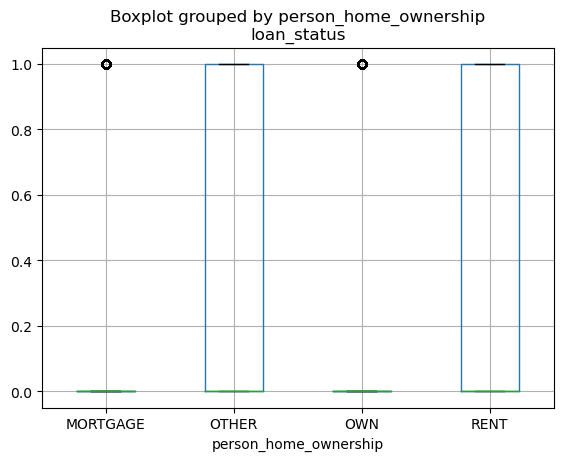

In [83]:
df.boxplot(by="person_home_ownership",column="loan_status") 

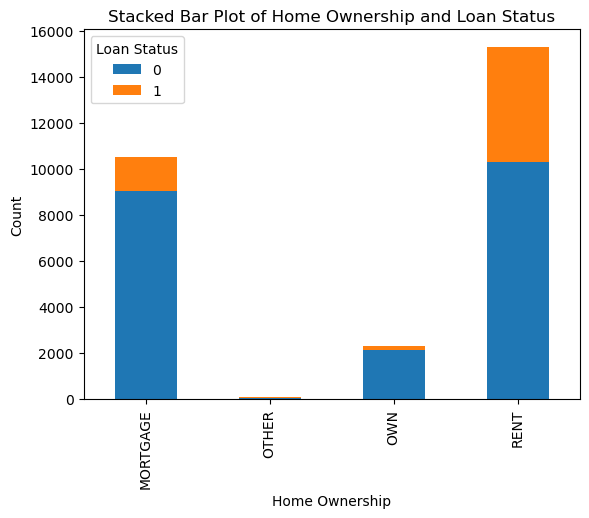

In [84]:
home_loan_status = df.groupby(["person_home_ownership", "loan_status"]).size().unstack()

home_loan_status.plot(kind="bar", stacked=True)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Home Ownership and Loan Status")
plt.legend(title="Loan Status")
plt.show() 

-  Home ownership can reflect stability and financial security, potentially reducing the risk of default.But most of the persons are rented houses.

### Analysing relationship between loan_status and person_emp_length(num vs num)

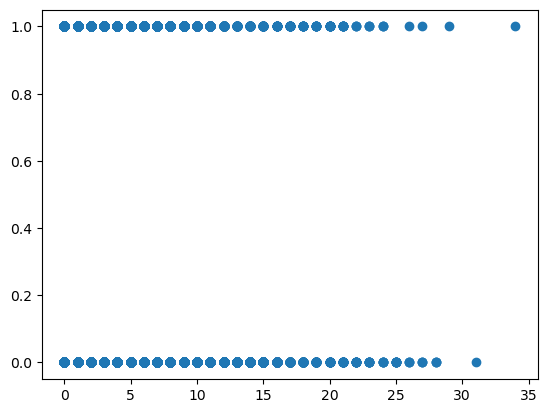

In [85]:
plt.scatter(x=df["person_emp_length"],y=df["loan_status"])

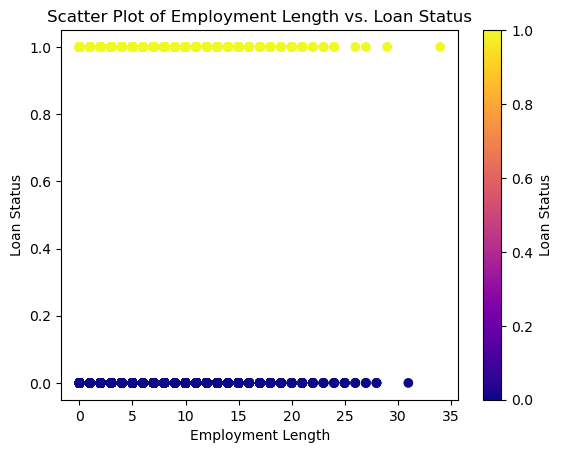

In [86]:
plt.scatter(x=df["person_emp_length"], y=df["loan_status"], c=df["loan_status"], cmap="plasma")
plt.xlabel("Employment Length")
plt.ylabel("Loan Status")
plt.title("Scatter Plot of Employment Length vs. Loan Status")
plt.colorbar(label="Loan Status")
plt.show() 

-  Longer employment length suggests job stability and a consistent income source, reducing the risk of default.It impacts loan_status feature.

### Analysing relationship between loan_status and loan_intent attributes(num vs cat)

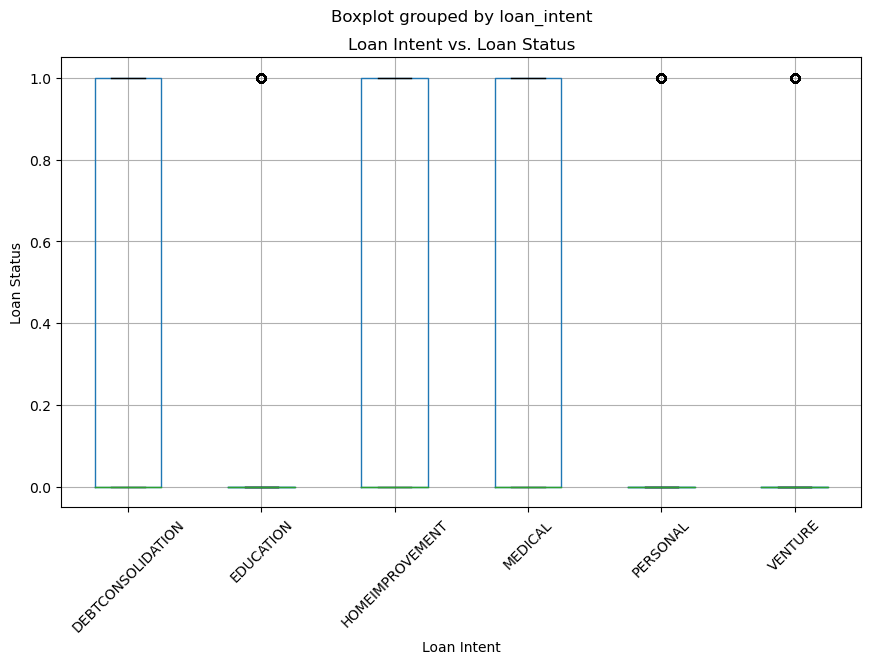

In [87]:
boxplot = df.boxplot(column='loan_status', by='loan_intent', figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Loan Intent')
plt.ylabel('Loan Status')
plt.title('Loan Intent vs. Loan Status')
plt.show()

- Different loan intents may have varying levels of risk associated with them.Loan for education might have different default rates compared to a loan for debt consolidation. It impacts the loan_status column.

### Analysing relationship between loan_grade and loan_status features(num vs cat)

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_grade'>

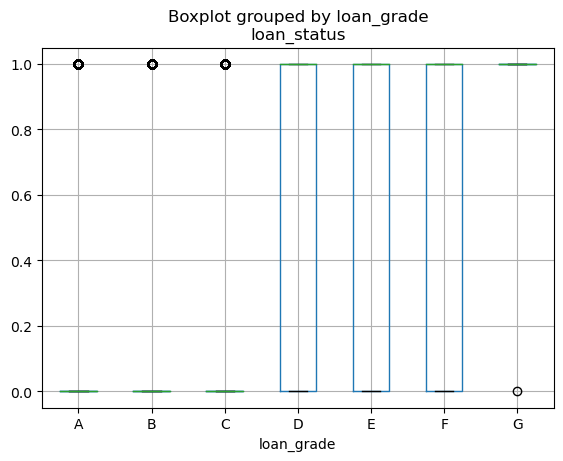

In [88]:
# applying box plot for loan_status and loan_grade features (Num vs Cat)
df.boxplot(by="loan_grade",column="loan_status") 

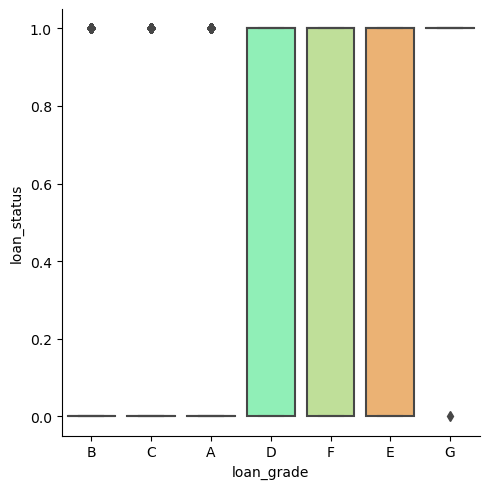

In [89]:
sns.catplot(x='loan_grade',y='loan_status', data=df, kind='box',palette='rainbow')
plt.show()

- Loan grades typically reflect the creditworthiness of the borrower. Higher-grade loans are expected to have lower default rates.    

### Analysing relationship between loan_status and loan_amnt attributes(num vs num)

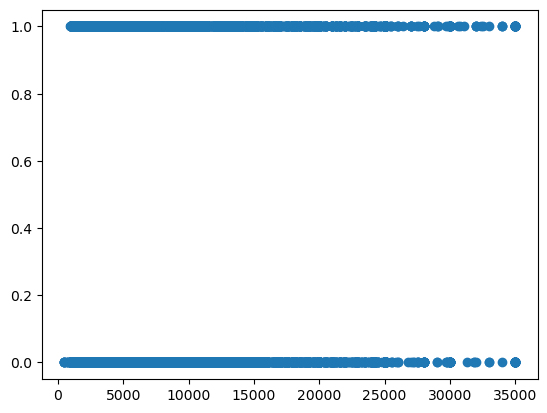

In [90]:
plt.scatter(x=df["loan_amnt"],y=df["loan_status"])

- The loan amount can impact the borrower's ability to repay. Higher loan amounts may be associated with higher default risks.

### Analysing relationship between loan_status and loan_int_rate columns(num vs num)

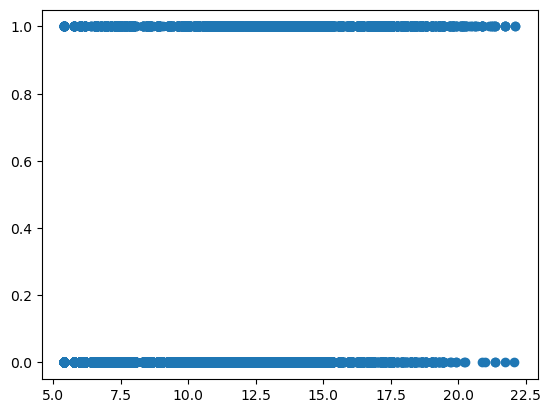

In [91]:
plt.scatter(x=df["loan_int_rate"],y=df["loan_status"])

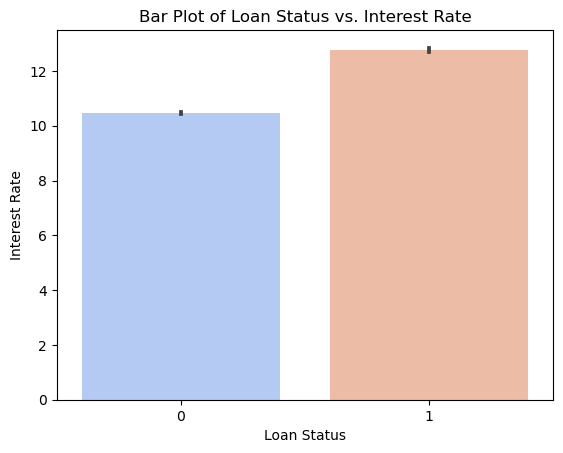

In [92]:
sns.barplot(x=df["loan_status"], y=df["loan_int_rate"], palette="coolwarm")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate") 
plt.title("Bar Plot of Loan Status vs. Interest Rate")
plt.show()

- Higher interest rates may increase the likelihood of default, as they lead to higher loan repayment burdens. 

### Analysing relationship between loan_status and loan_percent_income features(num vs num)

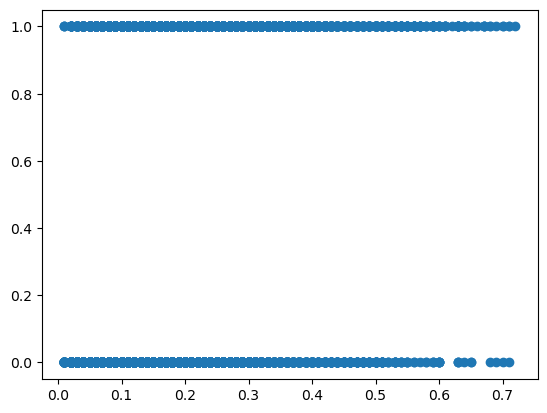

In [93]:
plt.scatter(x=df["loan_percent_income"],y=df["loan_status"]) 

- A higher percentage of income dedicated to loan repayment may indicate a higher risk of default.

### Analysing relationship between loan_status and cb_person_default_on_file attributes(num vs cat)

<AxesSubplot:title={'center':'loan_status'}, xlabel='cb_person_default_on_file'>

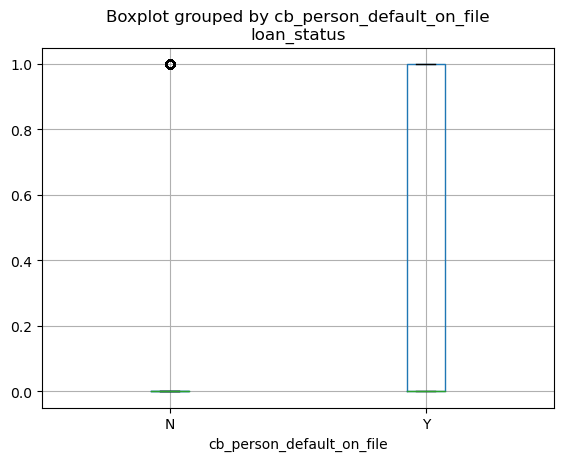

In [94]:
# applying box plot for loan_status and loan_grade features (Num vs Cat)
df.boxplot(by="cb_person_default_on_file",column="loan_status") 

-  Individuals with a history of default may have a higher chance of defaulting on new loans.

### Analysing relationship between and loan_status and cb_person_cred_hist_length attrinutes(num vs num)

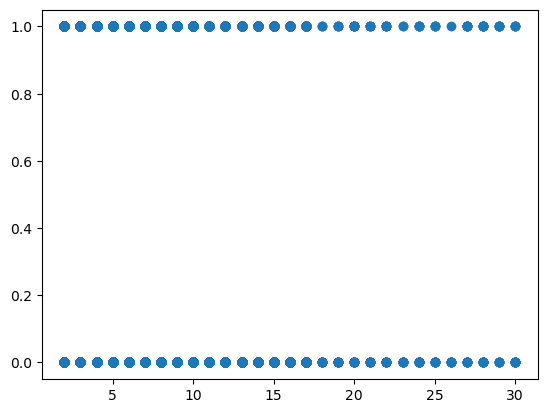

In [97]:
plt.scatter(x=df["cb_person_cred_hist_length"],y=df["loan_status"]) 

- Longer credit history often indicates a better credit profile, which may lower the likelihood of default

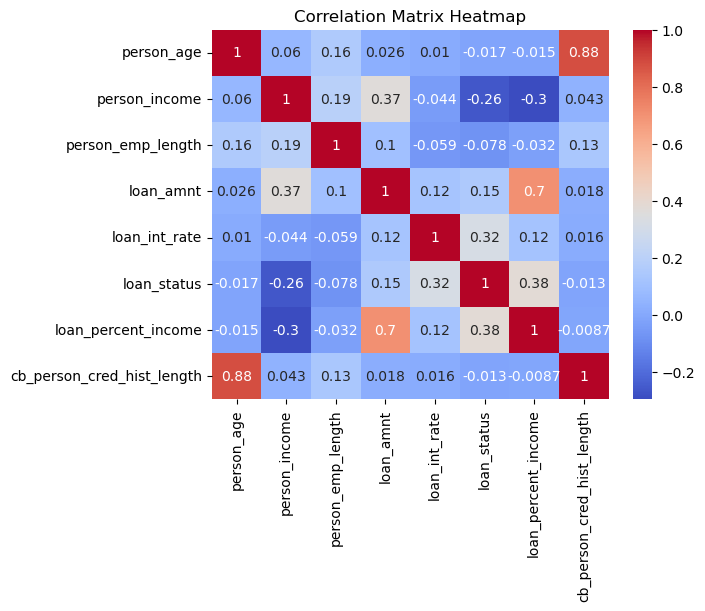

In [98]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show() 

# Insights

- There might be a relationship between a person's age and loan status. Older individuals may have a lower likelihood of defaulting on loans compared to younger individuals. Further analysis is needed to confirm this relationship.
- Higher income levels could potentially be associated with a lower likelihood of loan default. Analyzing the distribution of income for defaulted and non-defaulted loans can provide insights into this relationship.
- The distribution of loan status indicates the balance between defaulted and non-defaulted loans in the dataset. It helps understand the prevalence of loan defaults.
- The length of employment might influence loan status. Borrowers with longer employment history may have a lower risk of defaulting. Exploring the distribution of employment lengths for different loan statuses can provide more clarity.
- There may be a correlation between loan amount and loan status. Higher loan amounts might indicate a higher risk of default. Analyzing the loan amount distribution for defaulted and non-defaulted loans can reveal insights into this relationship.
- Interest rates may be higher for loans that are more likely to default. Examining the average interest rates for defaulted and non-defaulted loans can shed light on this relationship.
- Borrowers with a history of defaulting on previous loans may be more likely to default again. Analyzing the distribution of loan statuses for borrowers with and without a history of default can provide insights into this association.
- Loan grade, which represents the risk assessment of the loan, might be related to loan status. Higher loan grades may indicate a higher likelihood of default. Analyzing the distribution of loan statuses across different loan grades can provide insights into this relationship.

# Conclusions

`1.person_age`
- The age distribution of loan applicants can help the bank identify the target age groups for loan products and assess their risk profile.

`2.person_income`
- Analyzing the income distribution provides insights into the financial capacity of borrowers and helps determine appropriate loan amounts and interest rates.

`3.person_home_ownership`
- Understanding the home ownership status helps evaluate the stability and financial security of loan applicants.

`4.person_emp_length`
- The distribution of employment lengths helps assess the job stability of borrowers, which can impact loan repayment.

`5.loan_intent`
- Analyzing the loan intent helps tailor loan products and offerings to meet specific customer needs.

`6.loan_grade`
- Loan grades provide an indication of the creditworthiness of borrowers and help assess the risk associated with loans

`7.loan_amnt`
- Analyzing the distribution of loan amounts and interest rates helps determine appropriate loan terms and assess risk.

`8.loan_int_rate`
- Analyzing the loan status distribution provides insights into the overall loan default rate.

`9.loan_percent_income`
- Calculating the percentage of income spent on loan payments helps evaluate the affordability of loans for borrowers.

`10.cb_preson_cred_hist_length`
- Longer credit history lengths and clean default histories are positive indicators of creditworthiness.

# Recommandations

1. Segment customers based on risk profiles and assess creditworthiness using age, income, employment length, and home ownership variables.
2. Tailor loan products based on loan intent to meet specific customer needs and risk profiles.
3. Develop a credit scoring model using historical data to predict loan default risk and make more informed loan approval decisions.
4. Adjust loan amounts and interest rates based on the risk associated with different loan profiles to minimize default risk.
5. Ensure loan payments are affordable for borrowers by analyzing the loan percent income variable.
6. Offer lower interest rates and additional benefits to customers with longer credit history lengths and clean default histories to reduce default risk.
7. Continuously monitor loan performance and review risk mitigation strategies to minimize default rates and improve loan portfolio quality.

## Model preperation and model Building

In [99]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [100]:
df.shape

(28213, 12)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28213 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28213 non-null  int64  
 1   person_income               28213 non-null  int64  
 2   person_home_ownership       28213 non-null  object 
 3   person_emp_length           28213 non-null  float64
 4   loan_intent                 28213 non-null  object 
 5   loan_grade                  28213 non-null  object 
 6   loan_amnt                   28213 non-null  int64  
 7   loan_int_rate               28213 non-null  float64
 8   loan_status                 28213 non-null  int64  
 9   loan_percent_income         28213 non-null  float64
 10  cb_person_default_on_file   28213 non-null  object 
 11  cb_person_cred_hist_length  28213 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [102]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Data Preperation

## a) Identifying the inputs and outputs

In [104]:
X=df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]
y = df['loan_status']

In [105]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2


In [106]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

## Identify the type of ML Task
- Alogirthm - Supervised
- Task - Classification

## split the data into train_test data
- Here I'm splitting the data into 75:25 ratio.

In [107]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21159, 11) (21159,)
(7054, 11) (7054,)


## separating Numerical and categorical columns

In [108]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13580,22,40000,RENT,0.0,MEDICAL,A,12800,8.90,0.32,N,2
11132,23,50000,RENT,0.0,DEBTCONSOLIDATION,A,10000,10.99,0.20,N,2
29476,36,45000,RENT,3.0,DEBTCONSOLIDATION,C,1800,14.27,0.04,Y,15
6623,23,50000,MORTGAGE,3.0,PERSONAL,A,6000,6.92,0.12,N,2
24276,28,70900,MORTGAGE,12.0,EDUCATION,D,25000,15.37,0.35,Y,6


In [109]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [110]:
# categorical coulmns
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
13580,RENT,MEDICAL,A,N
11132,RENT,DEBTCONSOLIDATION,A,N
29476,RENT,DEBTCONSOLIDATION,C,Y
6623,MORTGAGE,PERSONAL,A,N
24276,MORTGAGE,EDUCATION,D,Y


In [111]:
# Numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13580,22,40000,0.0,12800,8.90,0.32,2
11132,23,50000,0.0,10000,10.99,0.20,2
29476,36,45000,3.0,1800,14.27,0.04,15
6623,23,50000,3.0,6000,6.92,0.12,2
24276,28,70900,12.0,25000,15.37,0.35,6


## Scaling the Numerical columns

In [112]:
X_train_num.head() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13580,22,40000,0.0,12800,8.90,0.32,2
11132,23,50000,0.0,10000,10.99,0.20,2
29476,36,45000,3.0,1800,14.27,0.04,15
6623,23,50000,3.0,6000,6.92,0.12,2
24276,28,70900,12.0,25000,15.37,0.35,6


In [113]:
# scaling the numerical features using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13580,-0.899333,-0.609882,-1.195401,0.692864,-0.686614,1.290341,-0.922642
11132,-0.736103,-0.139912,-1.195401,0.199465,-0.005787,0.184726,-0.922642
29476,1.385882,-0.374897,-0.410709,-1.245490,1.062687,-1.289427,2.325184
6623,-0.736103,-0.139912,-0.410709,-0.505391,-1.331608,-0.552350,-0.922642
24276,0.080045,0.842325,1.943365,2.842675,1.421017,1.566745,0.076689


In [114]:
# checking mean,median,standard deviation of numerical columns after rescaling
X_train_num.describe() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000
mean,27.509618,52977.047072,4.570207,8868.054965,11.007766,0.179950,5.693038
std,6.126482,21278.457465,3.823249,5675.051441,3.069870,0.108539,4.002772
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,36000.000000,2.000000,5000.000000,8.490000,0.100000,3.000000
50%,26.000000,50004.000000,4.000000,7700.000000,10.990000,0.160000,4.000000
75%,30.000000,69000.000000,7.000000,12000.000000,13.160000,0.240000,8.000000
max,80.000000,100000.000000,31.000000,35000.000000,22.110000,0.720000,30.000000


In [115]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_)) 

Number of Numerical Features: 7
Mean of each column: [2.75096177e+01 5.29770471e+04 4.57020653e+00 8.86805496e+03
 1.10077664e+01 1.79950376e-01 5.69303842e+00]
Std of each column: [6.12633738e+00 2.12779546e+04 3.82315893e+00 5.67491733e+03
 3.06979738e+00 1.08536890e-01 4.00267695e+00]


## Apply one-Hot encoding on categorical columns

In [116]:
# checking value_counts for 'person_home_ownership' column using normaization
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.541046
MORTGAGE    0.375065
OWN         0.080439
OTHER       0.003450
Name: person_home_ownership, dtype: float64

In [117]:
# checking value_counts for 'loan_intent' column using normaization
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.199301
MEDICAL              0.193487
VENTURE              0.172031
PERSONAL             0.171416
DEBTCONSOLIDATION    0.159034
HOMEIMPROVEMENT      0.104731
Name: loan_intent, dtype: float64

In [118]:
# checking value_counts for 'loan_grade' column using normaization
X_train_cat['loan_grade'].value_counts(normalize=True) 

A    0.329411
B    0.321471
C    0.200057
D    0.112151
E    0.028309
F    0.006900
G    0.001701
Name: loan_grade, dtype: float64

In [119]:
# checking value_counts for 'cb_person_default_on_file' column using normaization
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True) 

N    0.823857
Y    0.176143
Name: cb_person_default_on_file, dtype: float64

## splitting categorical columns into nominal and ordinal

In [120]:
## Nominal categorical columns
X_train_cat_Nominal = X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_cat_Nominal.head() 

,person_home_ownership,loan_intent,cb_person_default_on_file
13580,RENT,MEDICAL,N
11132,RENT,DEBTCONSOLIDATION,N
29476,RENT,DEBTCONSOLIDATION,Y
6623,MORTGAGE,PERSONAL,N
24276,MORTGAGE,EDUCATION,Y


In [122]:
## ordinal catogorical coumns
X_train_cat_Ordinal = X_train_cat["loan_grade"] 
X_train_cat_Ordinal

13580    A
11132    A
29476    C
6623     A
24276    D
        ..
12558    B
27957    B
15299    A
25726    B
6015     B
Name: loan_grade, Length: 21159, dtype: object

In [123]:
X_train_cat_Nominal.head() 

,person_home_ownership,loan_intent,cb_person_default_on_file
13580,RENT,MEDICAL,N
11132,RENT,DEBTCONSOLIDATION,N
29476,RENT,DEBTCONSOLIDATION,Y
6623,MORTGAGE,PERSONAL,N
24276,MORTGAGE,EDUCATION,Y


In [124]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(X_train_cat_Nominal), 
                               columns=encoder.get_feature_names_out(X_train_cat_Nominal.columns), 
                               index = X_train_cat_Nominal.index)

X_train_cat_OneEnc.head() 

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
13580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11132,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29476,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [125]:
X_train_cat_LabelEnc = pd.DataFrame(index=X_train_cat_Ordinal.index)

X_train_cat_LabelEnc.head() 

""
13580
11132
29476
6623
24276


In [127]:
cut_encoder = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}

X_train_cat_LabelEnc['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_train_cat_LabelEnc.head() 

,loan_grade
13580,7
11132,7
29476,5
6623,7
24276,4


## Concatinating the Nominal Categorical Features and Ordinal categorical Features:

In [128]:
X_train_rescaled_cat = pd.concat([X_train_cat_OneEnc,X_train_cat_LabelEnc], axis=1)

X_train_rescaled_cat.head() 

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7
11132,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
29476,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
6623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
24276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4


## Concatinating the Categorical Features and Nominal Features:

In [129]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_rescaled_cat ], axis=1)

X_train_transformed.head() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13580,-0.899333,-0.609882,-1.195401,0.692864,-0.686614,1.290341,-0.922642,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7
11132,-0.736103,-0.139912,-1.195401,0.199465,-0.005787,0.184726,-0.922642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
29476,1.385882,-0.374897,-0.410709,-1.245490,1.062687,-1.289427,2.325184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
6623,-0.736103,-0.139912,-0.410709,-0.505391,-1.331608,-0.552350,-0.922642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
24276,0.080045,0.842325,1.943365,2.842675,1.421017,1.566745,0.076689,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4


## Preparing test Data

In [130]:
X_test.head()  

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13904,23,98000,OWN,6.0,EDUCATION,D,10000,18.07,0.10,Y,3
19077,30,33200,RENT,4.0,VENTURE,A,14000,7.29,0.42,N,10
17597,22,67500,RENT,1.0,VENTURE,B,7500,9.76,0.11,N,3
10455,23,68000,MORTGAGE,5.0,EDUCATION,B,11500,9.99,0.17,N,3
11030,23,100000,RENT,4.0,VENTURE,B,4150,10.65,0.04,N,2


In [131]:
# checking info of the X_test data
X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7054 entries, 13904 to 13162
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7054 non-null   int64  
 1   person_income               7054 non-null   int64  
 2   person_home_ownership       7054 non-null   object 
 3   person_emp_length           7054 non-null   float64
 4   loan_intent                 7054 non-null   object 
 5   loan_grade                  7054 non-null   object 
 6   loan_amnt                   7054 non-null   int64  
 7   loan_int_rate               7054 non-null   float64
 8   loan_percent_income         7054 non-null   float64
 9   cb_person_default_on_file   7054 non-null   object 
 10  cb_person_cred_hist_length  7054 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 661.3+ KB


In [132]:
# separating categorical columns
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head() 

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
13904,OWN,EDUCATION,D,Y
19077,RENT,VENTURE,A,N
17597,RENT,VENTURE,B,N
10455,MORTGAGE,EDUCATION,B,N
11030,RENT,VENTURE,B,N


In [133]:
# separarting numerical columns of test data
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13904,23,98000,6.0,10000,18.07,0.10,3
19077,30,33200,4.0,14000,7.29,0.42,10
17597,22,67500,1.0,7500,9.76,0.11,3
10455,23,68000,5.0,11500,9.99,0.17,3
11030,23,100000,4.0,4150,10.65,0.04,2


In [134]:
# rescaling numerical columns of test data
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13904,-0.736103,2.115944,0.373982,0.199465,2.300554,-0.736619,-0.672809
19077,0.406504,-0.929462,-0.149145,0.904321,-1.211079,2.211687,1.076020
17597,-0.899333,0.682535,-0.933837,-0.241070,-0.406465,-0.644485,-0.672809
10455,-0.736103,0.706034,0.112418,0.463786,-0.331542,-0.091677,-0.672809
11030,-0.736103,2.209938,-0.149145,-0.831387,-0.116544,-1.289427,-0.922642


## splitting categorical columns into nominal and ordinal

In [136]:
## Nominal categorical columns
X_test_cat_Nominal = X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_cat_Nominal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
13904,OWN,EDUCATION,Y
19077,RENT,VENTURE,N
17597,RENT,VENTURE,N
10455,MORTGAGE,EDUCATION,N
11030,RENT,VENTURE,N


In [137]:
## ordinal catogorical coumns
X_test_cat_Ordinal = X_test_cat["loan_grade"]
X_test_cat_Ordinal.head()

13904    D
19077    A
17597    B
10455    B
11030    B
Name: loan_grade, dtype: object

In [138]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(drop='first', sparse=False)

X_test_cat_OneEnc = pd.DataFrame(encoder.transform(X_test_cat_Nominal), 
                               columns=encoder.get_feature_names_out(X_test_cat_Nominal.columns), 
                               index = X_test_cat_Nominal.index)

X_test_cat_OneEnc.head() 

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
13904,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19077,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11030,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [139]:
X_test_cat_ord = X_test_cat[['loan_grade']]
X_test_cat_ord = pd.DataFrame(X_test_cat_ord, columns=['loan_grade']) 

X_test_cat_ord.head()

,loan_grade
13904,D
19077,A
17597,B
10455,B
11030,B


In [140]:
X_test_cat_LabelEnc = pd.DataFrame(index=X_test_cat_ord.index)

X_test_cat_LabelEnc.head()

""
13904
19077
17597
10455
11030


In [142]:
X_test_cat_ord.loan_grade.unique()

array(['D', 'A', 'B', 'C', 'F', 'E', 'G'], dtype=object)

In [143]:
X_test_cat_LabelEnc['loan_grade'] = X_test_cat_ord['loan_grade'].apply(lambda x : cut_encoder[x])

X_test_cat_LabelEnc.head() 

,loan_grade
13904,4
19077,7
17597,6
10455,6
11030,6


## Concatinating the Nominal Categorical Features and Ordinal categorical Features:

In [144]:
X_test_rescaled_cat = pd.concat([X_test_cat_OneEnc,X_test_cat_LabelEnc], axis=1)

X_test_rescaled_cat.head() 

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13904,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
19077,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
17597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
10455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11030,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6


## Concatinating Numerical and categorical columns

In [145]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_rescaled_cat ], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13904,-0.736103,2.115944,0.373982,0.199465,2.300554,-0.736619,-0.672809,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
19077,0.406504,-0.929462,-0.149145,0.904321,-1.211079,2.211687,1.076020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
17597,-0.899333,0.682535,-0.933837,-0.241070,-0.406465,-0.644485,-0.672809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
10455,-0.736103,0.706034,0.112418,0.463786,-0.331542,-0.091677,-0.672809,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11030,-0.736103,2.209938,-0.149145,-0.831387,-0.116544,-1.289427,-0.922642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6


## Building a model using Logistic regression

In [146]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train) 

LogisticRegression()

## Prediction

In [147]:
y_test_pred = classifier.predict(X_test_transformed)

## Evaluation

In [148]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8467536149702296

## Model Building using other methods

## KNN Classifier

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred) 

0.8860221151119932

## Decision Tree Classifier

In [151]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8858803515735753

## Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9330876098667423

### Conclusion : Random Forest gives the best result,compare to other methods